In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv') 

In [4]:
data.shape

(142524, 14)

In [5]:
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [6]:
data.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [8]:
df = data.drop(columns=['tickets_out', 'show_time', 'occu_perc'])

In [9]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [10]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [11]:
df.shape

(142524, 11)

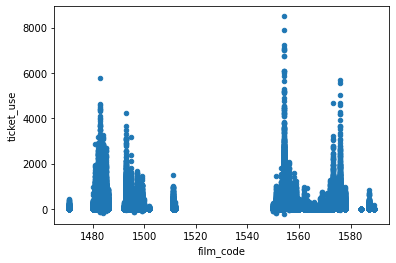

In [12]:
# pandas doesn't plot every single element clearly
df.plot(kind = 'scatter', x = 'film_code', y = 'ticket_use')

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

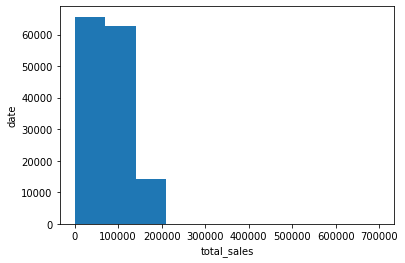

In [15]:
plt.hist(df["ticket_price"])
plt.xlabel("total_sales")
plt.ylabel("date")
plt.show()

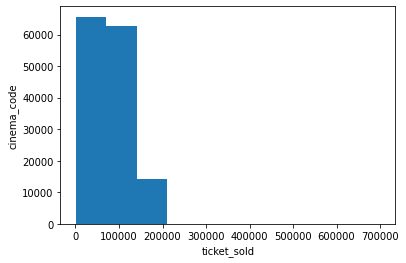

In [16]:
plt.hist(df["ticket_price"])
plt.xlabel("ticket_sold")
plt.ylabel("cinema_code")
plt.show()

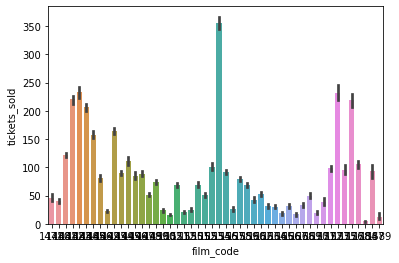

In [17]:
sns.barplot(y = 'tickets_sold', x = 'film_code', data = df)

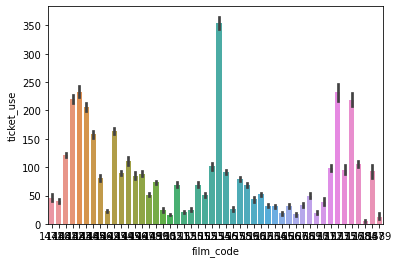

In [18]:
sns.barplot(y = 'ticket_use', x = 'film_code', data = df)

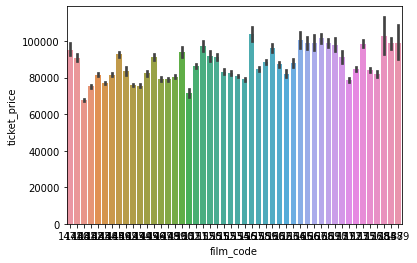

In [19]:
sns.barplot(x='film_code', y = 'ticket_price', data = df)

In [20]:
sns.set(rc={'figure.figsize':(15,3)})

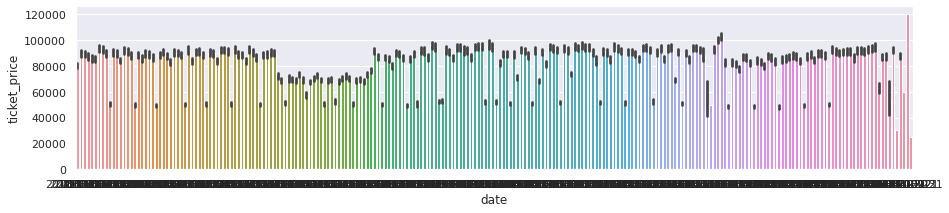

In [21]:
sns.barplot(x = 'date', y = 'ticket_price', data = df)

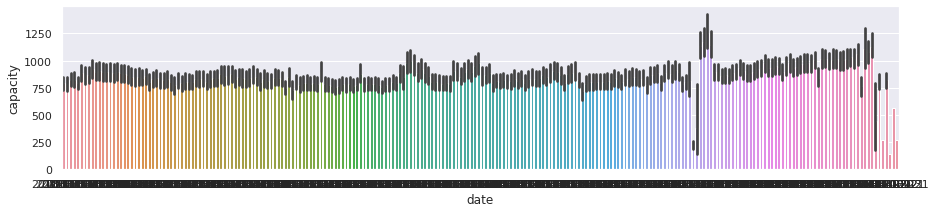

In [22]:
sns.barplot(x = 'date', y = 'capacity', data = df)

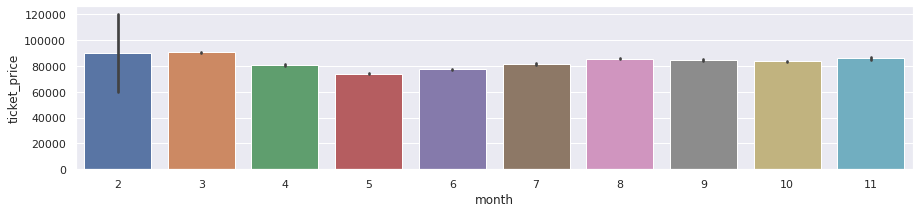

In [23]:
sns.barplot(x = 'month', y = 'ticket_price', data = df)

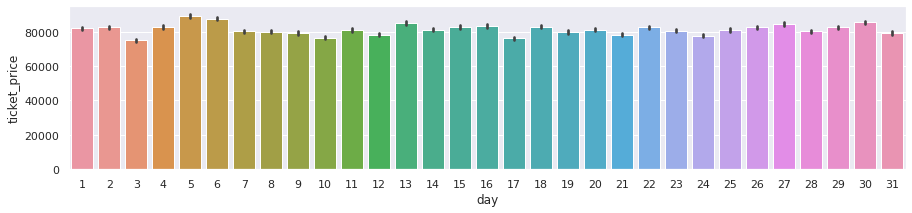

In [24]:
sns.barplot(x = 'day', y = 'ticket_price', data = df)

In [25]:
correlation = df.corr()

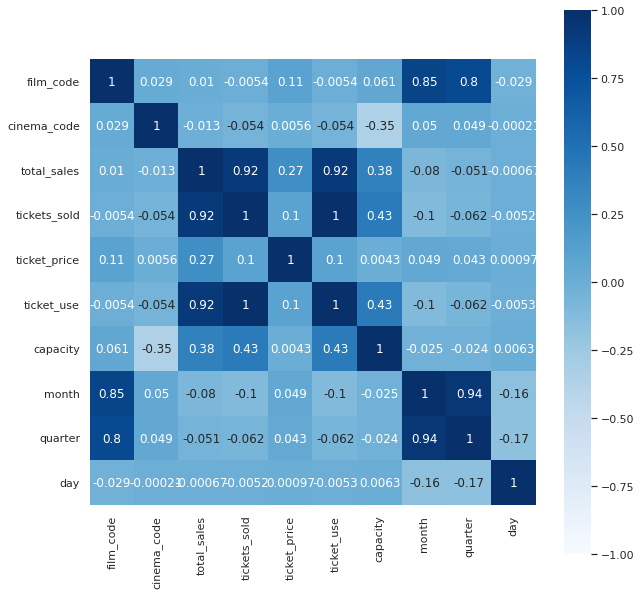

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, annot = True, cmap = 'Blues',vmin=-1,vmax=1)

Data Preprocessing

In [27]:
X = df.drop(['ticket_price', 'date'], axis = 1)

In [28]:
print(X)

        film_code  cinema_code  total_sales  tickets_sold  ticket_use  \
0            1492          304      3900000            26          26   
1            1492          352      3360000            42          42   
2            1492          489      2560000            32          32   
3            1492          429      1200000            12          12   
4            1492          524      1200000            15          15   
...           ...          ...          ...           ...         ...   
142519       1569          495      1320000            22          22   
142520       1569          474      1200000            15          15   
142521       1569          524      1060000             8           8   
142522       1569          529       600000             5           5   
142523       1569          486       250000             5           5   

          capacity  month  quarter  day  
0       610.328638      5        2    5  
1       519.801980      5        2    5

In [29]:
Y = df['ticket_price']

In [30]:
print(Y)

0         150000.0
1          80000.0
2          80000.0
3         100000.0
4          80000.0
            ...   
142519     60000.0
142520     80000.0
142521    132500.0
142522    120000.0
142523     50000.0
Name: ticket_price, Length: 142399, dtype: float64


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size = 0.8, test_size = 0.2)

In [32]:
print(Y.shape, Y_train.shape, Y_test.shape)

(142399,) (113919,) (28480,)


In [33]:
X_train

,film_code,cinema_code,total_sales,tickets_sold,ticket_use,capacity,month,quarter,day
32787,1551,486,6775000,271,271,840.049597,7,3,10
96755,1572,61,400000,4,4,400.000000,10,4,29
106714,1482,184,2000000,50,50,195.007800,7,3,4
78026,1576,210,30150000,603,603,832.987982,10,4,9
121332,1481,144,8400000,105,105,306.033226,4,2,4
...,...,...,...,...,...,...,...,...,...
41816,1575,489,45440000,569,565,902.315255,10,4,9
105744,1482,313,20080000,256,256,1216.152019,3,1,27
83849,1554,321,9150000,183,183,871.843735,7,3,21
54995,1484,52,36750000,372,372,2561.983471,4,2,4


In [34]:
X_test

,film_code,cinema_code,total_sales,tickets_sold,ticket_use,capacity,month,quarter,day
92011,1554,88,4440000,37,37,3008.130081,8,3,4
135564,1556,323,540000,9,9,347.490347,10,4,3
27506,1499,314,700000,10,10,483.091787,7,3,6
105571,1482,50,8640000,72,72,534.124629,3,1,29
120263,1481,198,4480000,64,64,187.025132,3,1,28
...,...,...,...,...,...,...,...,...,...
67904,1483,498,1200000,20,20,250.000000,4,2,25
73222,1483,452,8160000,102,102,390.057361,5,2,19
4625,1497,72,28620000,300,295,504.965494,5,2,18
102166,1485,181,14800000,164,164,900.109769,4,2,5


In [35]:
Y_train

32787      25000.000000
96755     100000.000000
106714     40000.000000
78026      50000.000000
121332     80000.000000
              ...      
41816      79859.402460
105744     78437.500000
83849      50000.000000
54995      98790.322581
61274      70000.000000
Name: ticket_price, Length: 113919, dtype: float64

In [36]:
Y_test

92011     120000.000000
135564     60000.000000
27506      70000.000000
105571    120000.000000
120263     70000.000000
              ...      
67904      60000.000000
73222      80000.000000
4625       95400.000000
102166     90243.902439
67222      50000.000000
Name: ticket_price, Length: 28480, dtype: float64

Model Training

In [37]:
model = RandomForestRegressor()

In [38]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [39]:
Y_pred = model.predict(X_test)

In [40]:
Y_pred

array([119903.50877193,  60000.        ,  70000.        , ...,
        96180.46624259,  89078.02313786,  49972.1020588 ])

In [42]:
r2_score(Y_test, Y_pred)

0.9983101058793431

In [43]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

1369.4473154737218